In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-prediction/sampleSubmission.csv
/kaggle/input/customer-churn-prediction/train.csv
/kaggle/input/customer-churn-prediction/test.csv


In [2]:
import pandas as pd                                     # Data analysis tool
import numpy as np                                      # Package for scientific computing
from sklearn.model_selection import train_test_split    # Splits arrays or matrices into random train and test subsets
from sklearn.model_selection import KFold               # Cross-validator
from sklearn.model_selection import cross_validate      # Evaluate metrics by cross-validation
from sklearn.model_selection import GridSearchCV        # Search over specified parameter values for an estimator
from sklearn.compose import ColumnTransformer           # Applies transformers to columns of DataFrames
from sklearn.pipeline import Pipeline                   # Helps building a chain of transforms and estimators
from sklearn.impute import SimpleImputer                # Imputation transformer for completing missing values
from sklearn.preprocessing import OneHotEncoder         # Encode categorical features
from sklearn.metrics import mean_absolute_error, mean_squared_error         # One of many statistical measures of error
from xgboost import XGBRegressor

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
training_set = pd.read_csv('../input/customer-churn-prediction/train.csv')
test_set = pd.read_csv('../input/customer-churn-prediction/test.csv')

In [4]:
training_set.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
X_train = training_set.copy()
y_train = X_train.churn
X_train.drop(['churn'], axis = 1, inplace = True)

In [6]:
X_test = test_set.copy()

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4250, 19)
(4250,)
(750, 20)


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
X_train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [10]:
X_test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [11]:
y_train

0       no
1       no
2       no
3       no
4       no
        ..
4245    no
4246    no
4247    no
4248    no
4249    no
Name: churn, Length: 4250, dtype: object

In [12]:
type(y_train)

pandas.core.series.Series

In [13]:
y_train = y_train.replace(to_replace=['no', 'yes'], value=[0, 1])

In [14]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train, y_train, 
                                                                train_size=0.8, 
                                                                test_size=0.2, 
                                                                random_state=0)

In [15]:
# Select categorical columns with no more than 15 unique values
categorical_cols = [col for col in X_train_full.columns if 
                   X_train_full[col].nunique() <= 15 and
                   X_train_full[col].dtype == 'object']

# Select numeric values
numeric_cols = [col for col in X_train_full.columns if
                X_train_full[col].dtype in ['int64', 'float64']]

# Keep selected columns
my_columns = categorical_cols + numeric_cols
X_train = X_train_full[my_columns].copy()
X_valid = X_valid_full[my_columns].copy()
X_test = X_test[my_columns].copy()

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [16]:
MSEs = {}

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500, solver='liblinear', random_state = 0)

my_pipeline_LR = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

my_pipeline_LR.fit(X_train, y_train)
preds = my_pipeline_LR.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['Logistic Regression'] = MSE
print('MSE:', MSE)

MSE: 0.12352941176470589


In [18]:
kfold = KFold(shuffle=True, random_state=0)
scores = cross_validate(my_pipeline_LR, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)

print('Average MSE score:', (scores['test_score'] * -1).mean())

Average MSE score: 0.13794117647058823


In [19]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(verbosity = 0, random_state = 0)

my_pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_xgb)])

my_pipeline_xgb.fit(X_train, y_train)
preds = my_pipeline_xgb.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['XGBoost'] = MSE
print('MSE:', MSE)

MSE: 0.03411764705882353


In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)

my_pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_knn)])

my_pipeline_knn.fit(X_train, y_train)
preds = my_pipeline_knn.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['KNN'] = MSE
print('MSE:', MSE)

MSE: 0.09529411764705882


In [21]:
from sklearn.svm import SVC
model_svc = SVC(gamma='auto')

my_pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_svc)])

my_pipeline_svc.fit(X_train, y_train)
preds = my_pipeline_svc.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['SVM'] = MSE
print('MSE:', MSE)

MSE: 0.13529411764705881


In [22]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

my_pipeline_nb = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_nb)])

my_pipeline_nb.fit(X_train, y_train)
preds = my_pipeline_nb.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['Naive Bayes'] = MSE
print('MSE:', MSE)

MSE: 0.12352941176470589


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()

my_pipeline_lda = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_lda)])

my_pipeline_lda.fit(X_train, y_train)
preds = my_pipeline_lda.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['LDA'] = MSE
print('MSE:', MSE)

MSE: 0.13176470588235295


In [24]:
from sklearn.ensemble import BaggingClassifier
model_bagging = BaggingClassifier(n_jobs = -1, random_state = 0)

my_pipeline_bagging = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_bagging)])

my_pipeline_bagging.fit(X_train, y_train)
preds = my_pipeline_bagging.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['Bagging'] = MSE
print('MSE:', MSE)

MSE: 0.047058823529411764


In [25]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=0, n_jobs = -1)

my_pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', model_rf)])

my_pipeline_rf.fit(X_train, y_train)
preds = my_pipeline_rf.predict(X_valid)
MSE = mean_squared_error(y_valid, preds)
MSEs['Random Forest'] = MSE
print('MSE:', MSE)

MSE: 0.03294117647058824


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

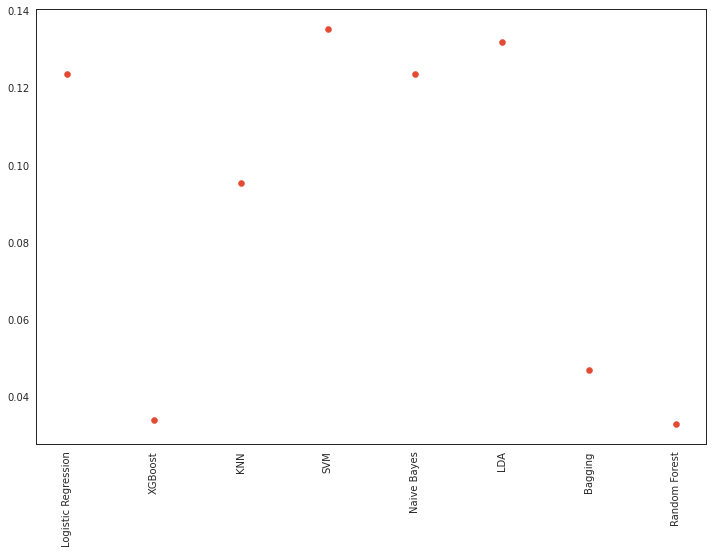

In [26]:
import matplotlib.pyplot as plt
plt.scatter(MSEs.keys(), MSEs.values())
plt.xticks(rotation=90)

Random forest and XGB are methods worth optimising on

In [27]:
kfold = KFold(shuffle=True, random_state=0)
scores = cross_validate(my_pipeline_rf, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)

print('Average MSE score with Random Forest:', (scores['test_score'] * -1).mean())

Average MSE score with Random Forest: 0.04441176470588235


In [28]:
kfold = KFold(shuffle=True, random_state=0)
scores = cross_validate(my_pipeline_xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)

print('Average MSE score with XGB:', (scores['test_score'] * -1).mean())

Average MSE score with XGB: 0.04470588235294118


In [29]:
final_model = model_rf
final_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', final_model)
])

X_train = training_set.copy()
y_train = X_train.churn

final_pipeline.fit(X_train, y_train)

final_prediction = final_pipeline.predict(X_test)

In [30]:
output = pd.DataFrame({
    'id': test_set.id,
    'churn': final_prediction
})
output.to_csv('submission.csv', index = False)

In [31]:
final_prediction.shape

(750,)

With the above, we've gotten up to 94% accuracy. Let's see if we can get better with some feature engineering or dimensionality reduction.